In [1]:
# Bibliothéques nécessaires
# POUR LA GÉNRATION DES GRAPHES
import networkx as nx
# POUR L'AFFICHAGE DES GRAPHES
import matplotlib.pyplot as plt
%matplotlib inline
# POUR LA RÉSOLUTION DES PROBLÈME LINÉAIRE : API Gurobi
import gurobipy as gp
from gurobipy import GRB
import random
from gurobipy import quicksum
import mylibrary.my_networkx as my_nx
import csv


# Géneration des graphes de différents types 

##### - Géneration de graphe complet (bidirectionnel & même poids dans les deux directions)

In [2]:
def generer_graphe_complet(nb_sommets):
    G = nx.DiGraph()
    for i in range(1, nb_sommets + 1):
        G.add_node(i)

    for i in range(1, nb_sommets + 1):
        for j in range(i + 1, nb_sommets + 1):
            capacite = random.randrange(100, 200)
            cout = random.randrange(10, 1000)
            G.add_edge(i, j, weight=(capacite, cout))
            G.add_edge(j, i, weight=(capacite, cout))

    return G

###### - Géneration de graphe cyclique unidirectionnel 

In [3]:
def generer_graphe_cyclique_unidirectionnel(nb_sommets):
    G = nx.DiGraph()
    for i in range(1, nb_sommets):
        capacite, cout = random.randrange(1000, 2000), random.randrange(10, 1000)
        G.add_edge(i, i + 1, weight=(capacite,cout))

    poids_final = (random.randrange(20, 50), random.randrange(10, 1000))
    G.add_edge(nb_sommets, 1, weight=poids_final)

    return G

###### - Géneration de graphe cyclique bi-directionnel

In [4]:
def generer_graphe_cyclique_bidirectionnel(nb_sommets):
    G = nx.DiGraph()
    for i in range(1, nb_sommets):
        capacite1, cout1 = random.randrange(1000, 2000), random.randrange(10, 1000)
        capacite2, cout2 = random.randrange(1000, 2000), random.randrange(10, 1000)
        
        G.add_edge(i, i + 1, weight=(capacite1, cout1))
        G.add_edge(i + 1, i, weight=(capacite2, cout2))

    capacite_final, cout_final = random.randrange(20, 50), random.randrange(10, 1000)
    G.add_edge(nb_sommets, 1, weight=(capacite_final, cout_final))
    G.add_edge(1, nb_sommets, weight=(capacite_final, cout_final))

    return G

###### - Géneration de graphe complet mixte

In [5]:
def generer_graphe_complet_mixte(nb_sommets, prob_bidirectionnel=0.2):
    G = nx.DiGraph()

    for i in range(1, nb_sommets + 1):
        G.add_node(i)

    for i in range(1, nb_sommets + 1):
        for j in range(i + 1, nb_sommets + 1):
            capacite = random.randrange(1000, 2000)
            cout_unite = random.randrange(10, 1000)
            capacite2 = random.randrange(1000, 2000)
            cout_unite2 = random.randrange(10, 1000)

            # Décider aléatoirement si le trajet est bidirectionnel
            is_bidirectionnel = random.choices([True, False], [prob_bidirectionnel, 1 - prob_bidirectionnel])[0]

            if is_bidirectionnel:
                G.add_edge(i, j, weight=(capacite, cout_unite))
                G.add_edge(j, i, weight=(capacite2, cout_unite2))
            else:
                G.add_edge(i, j, weight=(capacite, cout_unite))

    return G

##### - Géneration des graphes selon le type

In [6]:
def generer_graphe(type_graphe=None, nb_sommets=None):
    if type_graphe is None:
        type_graphe = "aleatoire"
    if nb_sommets is None:
        nb_sommets = random.randrange(5, 10, 1)

    if type_graphe == "complet":
        return generer_graphe_complet(nb_sommets)
    elif type_graphe == "cyclique":
        return generer_graphe_cyclique_unidirectionnel(nb_sommets)
    elif type_graphe == "cyclique-bi":
        return generer_graphe_cyclique_bidirectionnel(nb_sommets)
    elif type_graphe == "complet-mixte":
        return generer_graphe_complet_mixte(nb_sommets)
    elif type_graphe == "aleatoire":
        return generer_graphe(random.choice(["complet", "cyclique","cyclique-bi","complet-mixte"]), nb_sommets)
    else:
        raise ValueError("Type de graphe non reconnu")

##### - Affichage du graphe 

In [7]:
def afficher_graphe_unidirectionnel(graph):
    pos = nx.spring_layout(graph, weight=None)
    nx.draw(graph, pos, with_labels=True, node_color="red")
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

In [8]:
def afficher_graphe_bidirectionnel(G, arc_rad=0.25):
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G, weight=None)
    nx.draw_networkx_nodes(G, pos,node_color="red", ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))   
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

    edge_weights = nx.get_edge_attributes(G, 'weight')
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}

    my_nx.my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels, rotate=False, rad=arc_rad)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)

    
    plt.show()

In [9]:
def afficher_graphe(G,type_graphe=None):
    if type_graphe is None:
        type_graphe = "aleatoire"

    if type_graphe == "complet":
        afficher_graphe_unidirectionnel(G)
    elif type_graphe == "cyclique":
        afficher_graphe_unidirectionnel(G)
    elif type_graphe == "cyclique-bi":
        afficher_graphe_bidirectionnel(G)
    elif type_graphe == "complet-mixte":
        afficher_graphe_bidirectionnel(G)
    elif type_graphe == "aleatoire":
        afficher_graphe_unidirectionnel(G)
    else:
        raise ValueError("Type de graphe non reconnu")

##### -Tests 

###### -Graphe complet

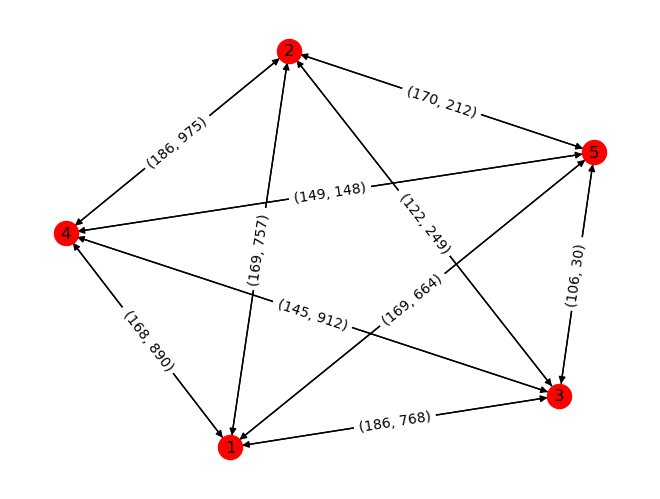

In [10]:
G_complet = generer_graphe("complet", 5)
afficher_graphe(G_complet,"complet")

###### -Graphe complet mixte

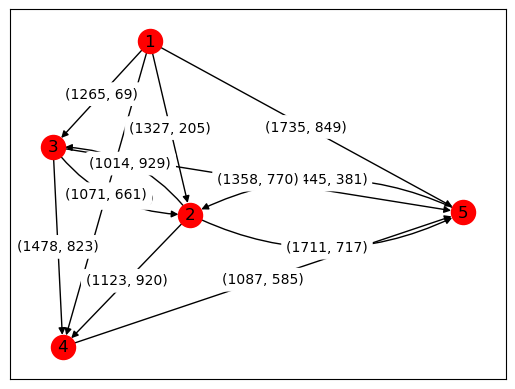

In [11]:
G_complet_mixte = generer_graphe("complet-mixte", 5)
afficher_graphe(G_complet_mixte,"complet-mixte")

###### -Graphe cyclique unidirectionnel

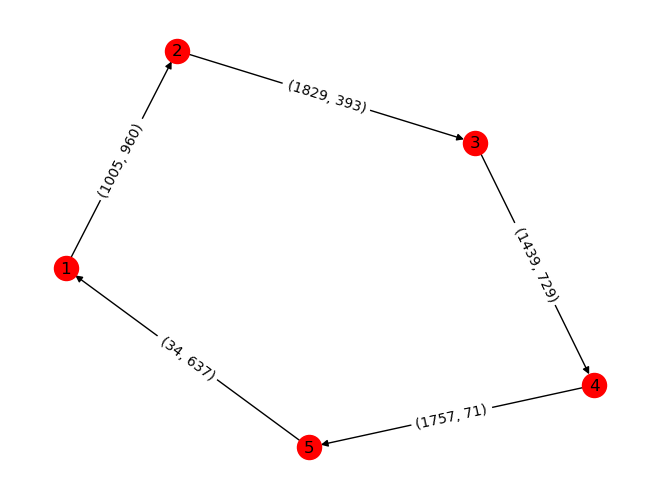

In [12]:
G_cyclique = generer_graphe("cyclique", 5)
afficher_graphe(G_cyclique,"cyclique")

###### -Graphe cyclique bidirectionnel

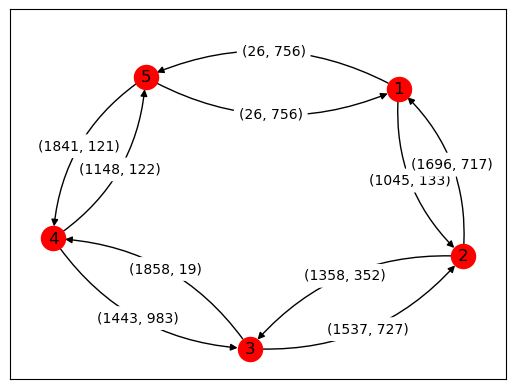

In [13]:
G_cyclique_bidirectionnel = generer_graphe("cyclique-bi", 5)
afficher_graphe(G_cyclique_bidirectionnel,"cyclique-bi")

# Géneration d'un sous ensemble de noeuds

In [14]:
def genererSousEnsemble(G, nb):
    nodes_list = list(G.nodes())
    nb = min(nb, len(nodes_list))
    S = random.sample(nodes_list, nb)
    return S

##### Tests

In [15]:
S = genererSousEnsemble(G_complet, 4)
print(S)

[1, 4, 2, 3]


# Géneration du vecteur trafic t=(tij)

In [16]:
def generer_vecteur_demande_trafic(graph, sous_ensemble_noeuds):
    demandes_trafic = {}

    # Générer des demandes de trafic aléatoires pour chaque paire de nœuds dans le sous-ensemble
    for u in sous_ensemble_noeuds:
        for v in sous_ensemble_noeuds:
            if u != v:
                demande = random.randrange(1, 50)  # Exemple de demande aléatoire entre 1 et 100
                demandes_trafic[(u, v)] = demande

    return demandes_trafic



In [17]:
T=generer_vecteur_demande_trafic(G_complet, S)

In [18]:
print(T)

{(1, 4): 2, (1, 2): 16, (1, 3): 34, (4, 1): 34, (4, 2): 5, (4, 3): 47, (2, 1): 3, (2, 4): 30, (2, 3): 47, (3, 1): 45, (3, 4): 34, (3, 2): 26}


# Exportation du graphe dans un fichier csv (génération inclue)

In [19]:
def sauvegarder_donnees_csv(type_graphe="complet", nb_sommets=5,taille_S=4, nom_fichier=None):
    G=generer_graphe(type_graphe,nb_sommets)
    S = genererSousEnsemble(G, taille_S)
    demandes_trafic=generer_vecteur_demande_trafic(G, S)
    
    if(nom_fichier==None):
        nom_fichier=f"{type_graphe}.csv"
   
    with open(nom_fichier, mode='w', newline='') as fichier:
        writer = csv.writer(fichier)

        # Écrire le nombre de nœuds et d'arêtes du graphe
        writer.writerow([G.number_of_nodes()])
        writer.writerow([G.number_of_edges()])

        # Écrire les informations sur les arêtes du graphe
        for edge in G.edges(data=True):
            i, j, poids = edge
            writer.writerow([i, j, poids['weight'][0], poids['weight'][1]])

        # Écrire le sous-ensemble de nœuds S
        writer.writerow(S)

        # Écrire le nombre de demandes de trafic
        writer.writerow([len(demandes_trafic)])

        # Écrire les demandes de trafic
        for (u, v), demande in demandes_trafic.items():
            writer.writerow([u, v, demande])

# Lecture des données à partir d'un fichier csv

In [20]:
def lire_donnees_csv(nom_fichier):
    G = nx.DiGraph()
    S = []
    demandes_trafic = {}

    with open(nom_fichier, mode='r') as fichier:
        reader = csv.reader(fichier)

        # Lire le nombre de nœuds et d'arêtes du graphe
        nb_sommets = int(next(reader)[0])
        nb_aretes = int(next(reader)[0])

        # Lire les informations sur les arêtes du graphe
        for _ in range(nb_aretes):
            i, j, capacite, cout = map(int, next(reader))
            G.add_edge(i, j, weight=(capacite, cout))

        # Lire le sous-ensemble de nœuds S
        S = list(map(int, next(reader)))

        # Lire le nombre de demandes de trafic
        nb_demandes = int(next(reader)[0])

        # Lire les demandes de trafic
        for _ in range(nb_demandes):
            u, v, demande = map(int, next(reader))
            demandes_trafic[(u, v)] = demande

    return G, S, demandes_trafic

## Exemple de génération et exportation et lecture d'un graphe

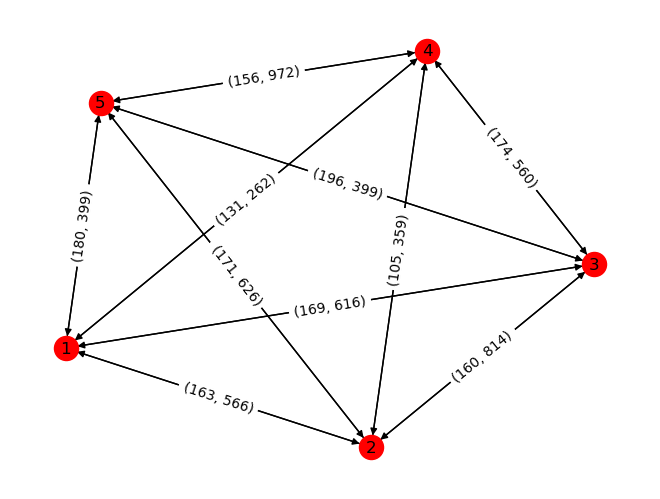

S= [3, 4, 5, 2]
demandes_trafic= {(3, 4): 25, (3, 5): 22, (3, 2): 31, (4, 3): 23, (4, 5): 27, (4, 2): 3, (5, 3): 22, (5, 4): 9, (5, 2): 46, (2, 3): 27, (2, 4): 23, (2, 5): 38}


In [21]:
# Graphe complet :
sauvegarder_donnees_csv(type_graphe="complet")
G_complet, S_complet, demandes_trafic_complet = lire_donnees_csv("complet.csv")
afficher_graphe(G_complet)
print("S=",S_complet)
print("demandes_trafic=",demandes_trafic_complet)

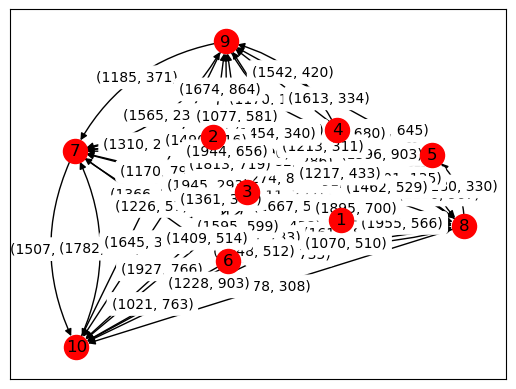

S= [9, 10, 3, 6, 4, 2]
demandes_trafic= {(9, 10): 11, (9, 3): 8, (9, 6): 9, (9, 4): 11, (9, 2): 30, (10, 9): 29, (10, 3): 44, (10, 6): 26, (10, 4): 45, (10, 2): 14, (3, 9): 2, (3, 10): 48, (3, 6): 2, (3, 4): 1, (3, 2): 29, (6, 9): 40, (6, 10): 27, (6, 3): 6, (6, 4): 17, (6, 2): 33, (4, 9): 30, (4, 10): 47, (4, 3): 25, (4, 6): 1, (4, 2): 33, (2, 9): 21, (2, 10): 34, (2, 3): 43, (2, 6): 20, (2, 4): 24}


In [22]:
# Graphe complet mixte :
sauvegarder_donnees_csv(type_graphe="complet-mixte",nb_sommets=10,taille_S=6)
G_complet_mixte, S_complet_mixte, demandes_trafic_complet_mixte = lire_donnees_csv("complet-mixte.csv")
afficher_graphe(G_complet_mixte,"complet-mixte")
print("S=",S_complet_mixte)
print("demandes_trafic=",demandes_trafic_complet_mixte)

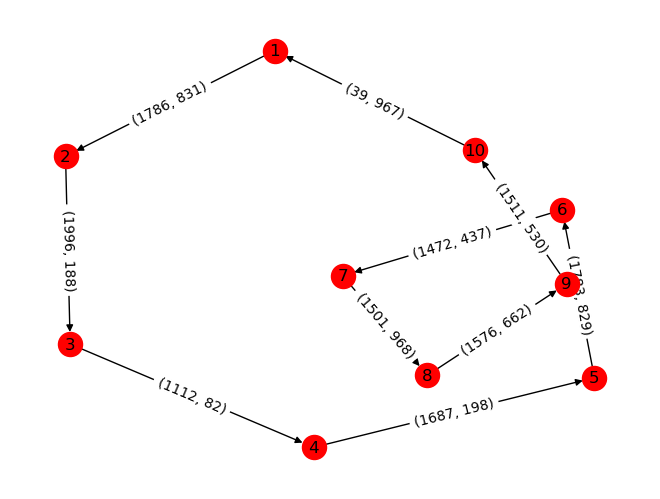

S= [8, 9, 10, 1, 3, 4]
demandes_trafic= {(8, 9): 25, (8, 10): 23, (8, 1): 31, (8, 3): 29, (8, 4): 40, (9, 8): 40, (9, 10): 35, (9, 1): 30, (9, 3): 44, (9, 4): 34, (10, 8): 13, (10, 9): 10, (10, 1): 19, (10, 3): 39, (10, 4): 46, (1, 8): 6, (1, 9): 8, (1, 10): 24, (1, 3): 12, (1, 4): 35, (3, 8): 22, (3, 9): 49, (3, 10): 38, (3, 1): 4, (3, 4): 19, (4, 8): 1, (4, 9): 45, (4, 10): 36, (4, 1): 20, (4, 3): 21}


In [23]:
# Graphe cyclique :
sauvegarder_donnees_csv(type_graphe="cyclique",nb_sommets=10,taille_S=6)
G_cyclique, S_cyclique, demandes_trafic_cyclique = lire_donnees_csv("cyclique.csv")
afficher_graphe(G_cyclique,"cyclique")
print("S=",S_cyclique)
print("demandes_trafic=",demandes_trafic_cyclique)

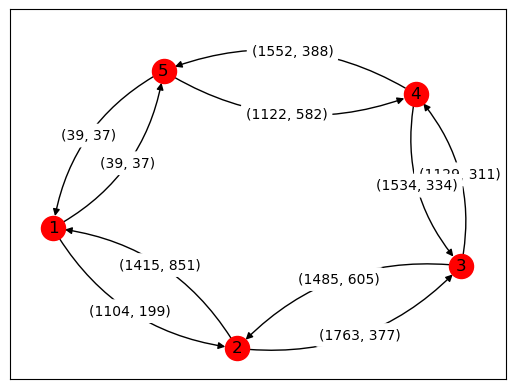

S= [4, 2, 1, 5]
demandes_trafic= {(4, 2): 12, (4, 1): 25, (4, 5): 40, (2, 4): 46, (2, 1): 34, (2, 5): 22, (1, 4): 11, (1, 2): 46, (1, 5): 39, (5, 4): 41, (5, 2): 2, (5, 1): 45}


In [24]:
# Graphe cyclique bidirectionnel :
sauvegarder_donnees_csv(type_graphe="cyclique-bi")
G_cyclique_bi, S_cyclique_bi, demandes_trafic_cyclique_bi = lire_donnees_csv("cyclique-bi.csv")
afficher_graphe(G_cyclique_bi,"cyclique-bi")
print("S=",S_cyclique_bi)
print("demandes_trafic=",demandes_trafic_cyclique_bi)

## Résolution des programmes linéaires

In [25]:
def resoudre_prob(G,S,demande_trafic, fct_obj) :
    try:
        #recuperation des demandes à partir du vecteur de trafic
        t = lambda demande_trafic, i, j: next((demande for (u, v), demande in demande_trafic.items() if u == i and v == j), 0)
        #recuperation des capacités et couts des arcs
        poids = nx.get_edge_attributes(G,'weight')
        # Création du modèle
        m = gp.Model()

        # Création des variables des proportions du trafic
        x = {(i, j, a[0], a[1]): m.addVar(vtype=GRB.CONTINUOUS, name=f"x({i},{j},{a[0]},{a[1]})")
         for i in S
         for j in S
         if i != j
         for a in G.edges()}
        
        
        #definir les fonctions objectives 1 et 2
        fct_obj_1 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j)*poids[a][1] for a in G.edges() for i in S for j in S if i!=j)
        fct_obj_2 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j)/len(G.edges)

        
        # CHoix de la fonction objective
        if fct_obj==1 :
            m.setObjective(fct_obj_1, GRB.MINIMIZE)
        elif fct_obj==2 :
            m.setObjective(fct_obj_2, GRB.MINIMIZE)
        elif fct_obj==3 :
            # Définir la fonction objectif (minimisation du maximum)
            obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)

            # Contrainte pour lier obj_min_max 
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)

            # Définir la fonction objectif (minimisation du maximum)
            m.setObjective(obj_min_max, GRB.MINIMIZE)
                        
                                    
        else :
            print("Erreur : la fonction objective demandée est non définie")
            
            
    #####Définition des contraintes   
        #Contrainte arcs sortant
        contrainte1=(quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte arcs entrant
        contrainte2=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte de conservation de flux
        contrainte3=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(k)) == quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(k)) for i in S for j in S if i != j for k in S if k != i and k != j)
        #Contrainte de capacité  
        contrainte4=(quicksum(x[i, j, a[0], a[1]] * t(T, i, j) for i in S for j in S if i != j) <= poids[a][0] for a in G.edges())
        
        m.addConstrs(contrainte1)
        m.addConstrs(contrainte2)
        m.addConstrs(contrainte3)
        m.addConstrs(contrainte4)
         
            
        # Optimiser le modèle
        m.optimize()

        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

        if m.status == GRB.Status.OPTIMAL:
            print("*" * 50)
            print("Solution optimale trouvée!")
            print(f"Valeur optimale de l'objectif : {m.objVal}")
            print("*" * 50)

            # Afficher les valeurs des variables
#             for var in m.getVars():
#                 if(var.x!=0.0):
#                     print(f"{var.varName} = {var.x}")

            print("*" * 50)
            return m.objVal
        elif m.status == GRB.Status.INFEASIBLE:
            print("*" * 50)
            print("Le problème est infaisable.")
            print("*" * 50)
            return -1
        elif m.status == GRB.Status.UNBOUNDED:
            print("*" * 50)
            print("Le problème est non borné.")
            print("*" * 50)
            return -1
        else:
            print("*" * 50)
            print("Le solveur n'a pas pu trouver de solution optimale.")
            print("*" * 50)
            return -1
        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

            
    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))
        return -1
        

        



In [26]:
resoudre_prob(G_complet,S_complet,demandes_trafic_complet,1)
resoudre_prob(G_complet,S_complet,demandes_trafic_complet,2)
resoudre_prob(G_complet,S_complet,demandes_trafic_complet,3)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 68 rows, 240 columns and 408 nonzeros
Model fingerprint: 0xba4d7334
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [8e+02, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 6 rows and 77 columns
Presolve time: 0.02s
Presolved: 62 rows, 163 columns, 331 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1464600e+05   0.000000e+00   0.000000e+00      0s
       0    2.1464600e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  2.146460000e+05
--------------------------------------------------
------------------

592.0

In [27]:
resoudre_prob(G_complet_mixte,S_complet_mixte,demandes_trafic_complet_mixte,1)
resoudre_prob(G_complet_mixte,S_complet_mixte,demandes_trafic_complet_mixte,2)
resoudre_prob(G_complet_mixte,S_complet_mixte,demandes_trafic_complet_mixte,3)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 234 rows, 1620 columns and 1874 nonzeros
Model fingerprint: 0xf0c2cb91
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [6e+01, 5e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 172 rows and 1432 columns
Presolve time: 0.01s
Presolved: 62 rows, 188 columns, 434 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.3449000e+05   5.500000e+00   0.000000e+00      0s
Extra simplex iterations after uncrush: 2
       6    5.4842300e+05   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.484230000e+05
--------------------------------------------------
---------------------------------------

1420.0

In [28]:
resoudre_prob(G_cyclique,S_cyclique,demandes_trafic_cyclique,1)
resoudre_prob(G_cyclique,S_cyclique,demandes_trafic_cyclique,2)
resoudre_prob(G_cyclique,S_cyclique,demandes_trafic_cyclique,3)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 190 rows, 300 columns and 360 nonzeros
Model fingerprint: 0x3e56cad5
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [8e+01, 5e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 190 rows and 300 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8935680e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.893568000e+06
--------------------------------------------------
--------------------------------------------------
**************************************************
Solution optimale trouvée!
Valeur optimale de l'object

3002.0

In [29]:
resoudre_prob(G_cyclique_bi,S_cyclique_bi,demandes_trafic_cyclique_bi,1)
resoudre_prob(G_cyclique_bi,S_cyclique_bi,demandes_trafic_cyclique_bi,2)
resoudre_prob(G_cyclique_bi,S_cyclique_bi,demandes_trafic_cyclique_bi,3)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 58 rows, 120 columns and 204 nonzeros
Model fingerprint: 0x27bf0660
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [7e+01, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 44 rows and 92 columns
Presolve time: 0.00s
Presolved: 14 rows, 28 columns, 57 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2284700e+05   1.000000e+00   0.000000e+00      0s
       2    1.4152300e+05   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.415230000e+05
--------------------------------------------------
--------------------------------------------------
**************************************

726.0

# Méthode léxicographique

In [30]:
#méthode lexicographique step 1 
def resoudre_prob_lexicographique_step1(G,S,demande_trafic) :
    w1 = resoudre_prob(G,S,demande_trafic,1)
    if w1 != -1:
        try:
            #recuperation des demandes à partir du vecteur de trafic
            t = lambda demande_trafic, i, j: next((demande for (u, v), demande in demande_trafic.items() if u == i and v == j), 0)
            #recuperation des capacités et couts des arcs
            poids = nx.get_edge_attributes(G,'weight')
            # Création du modèle
            m = gp.Model()

            # Création des variables des proportions du trafic
            x = {(i, j, a[0], a[1]): m.addVar(vtype=GRB.CONTINUOUS, name=f"x({i},{j},{a[0]},{a[1]})")
             for i in S
             for j in S
             if i != j
             for a in G.edges()}


            #definir la fonction objective 2
            fct_obj_2 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j)/len(G.edges)

            m.setObjective(fct_obj_2, GRB.MINIMIZE)


        #####Nouvelle contrainte
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(T,i,j)*poids[a][1] for a in G.edges() for i in S for j in S if i!=j) <= w1)



        #####Définition des contraintes   
            #Contrainte arcs sortant
            contrainte1=(quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(i)) == 1 for i in S for j in S if i != j)
            #Contrainte arcs entrant
            contrainte2=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(i)) == 1 for i in S for j in S if i != j)
            #Contrainte de conservation de flux
            contrainte3=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(k)) == quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(k)) for i in S for j in S if i != j for k in S if k != i and k != j)
            #Contrainte de capacité  
            contrainte4=(quicksum(x[i, j, a[0], a[1]] * t(T, i, j) for i in S for j in S if i != j) <= poids[a][0] for a in G.edges())

            m.addConstrs(contrainte1)
            m.addConstrs(contrainte2)
            m.addConstrs(contrainte3)
            m.addConstrs(contrainte4)


            # Optimiser le modèle
            m.optimize()

            print("-" * 50)
            print("=" * 50)
            print("-" * 50)

            if m.status == GRB.Status.OPTIMAL:
                print("*" * 50)
                print("Solution optimale trouvée!")
                print(f"Valeur optimale de l'objectif : {m.objVal}")
                print("*" * 50)

                # Afficher les valeurs des variables
    #             for var in m.getVars():
    #                 if(var.x!=0.0):
    #                     print(f"{var.varName} = {var.x}")

                print("*" * 50)
                return m.objVal
            elif m.status == GRB.Status.INFEASIBLE:
                print("*" * 50)
                print("Le problème est infaisable.")
                print("*" * 50)
                return -1
            elif m.status == GRB.Status.UNBOUNDED:
                print("*" * 50)
                print("Le problème est non borné.")
                print("*" * 50)
                return -1
            else:
                print("*" * 50)
                print("Le solveur n'a pas pu trouver de solution optimale.")
                print("*" * 50)
                return -1
            print("-" * 50)
            print("=" * 50)
            print("-" * 50)


        except gp.GurobiError as e:
            print('Error code ' + str(e.errno) + ': ' + str(e))
            return -1

In [31]:
def resoudre_prob_lexicographique_step2(G,S,demande_trafic):
    
    w1 = resoudre_prob(G,S,demande_trafic,1)
    print("*" * 50)
    print(">"*15,"w1 = ",w1,"<"*15)
    print("*" * 50)
    w2 = resoudre_prob_lexicographique_step1(G,S,demande_trafic)
    print("*" * 50)
    print(">"*15,"w2 = ",w2,"<"*15)
    print("*" * 50)
    if w1 != -1 and w2 != -1 :
        try:
            #recuperation des demandes à partir du vecteur de trafic
            t = lambda demande_trafic, i, j: next((demande for (u, v), demande in demande_trafic.items() if u == i and v == j), 0)
            #recuperation des capacités et couts des arcs
            poids = nx.get_edge_attributes(G,'weight')
            # Création du modèle
            m = gp.Model()

            # Création des variables des proportions du trafic
            x = {(i, j, a[0], a[1]): m.addVar(vtype=GRB.CONTINUOUS, name=f"x({i},{j},{a[0]},{a[1]})")
             for i in S
             for j in S
             if i != j
             for a in G.edges()}


            # Définir la fonction objectif (minimisation du maximum)
            obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)

            # Contrainte pour lier obj_min_max 
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)

            # Définir la fonction objectif (minimisation du maximum)
            m.setObjective(obj_min_max, GRB.MINIMIZE)

        #####Nouvelle contrainte
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(T,i,j)*poids[a][1] for a in G.edges() for i in S for j in S if i!=j) <= w1)
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(T,i,j) for a in G.edges() for i in S for j in S if i!=j)/len(G.edges) <= w2)


        #####Définition des contraintes   
            #Contrainte arcs sortant
            contrainte1=(quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(i)) == 1 for i in S for j in S if i != j)
            #Contrainte arcs entrant
            contrainte2=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(i)) == 1 for i in S for j in S if i != j)
            #Contrainte de conservation de flux
            contrainte3=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(k)) == quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(k)) for i in S for j in S if i != j for k in S if k != i and k != j)
            #Contrainte de capacité  
            contrainte4=(quicksum(x[i, j, a[0], a[1]] * t(T, i, j) for i in S for j in S if i != j) <= poids[a][0] for a in G.edges())

            m.addConstrs(contrainte1)
            m.addConstrs(contrainte2)
            m.addConstrs(contrainte3)
            m.addConstrs(contrainte4)


            # Optimiser le modèle
            m.optimize()

            print("-" * 50)
            print("=" * 50)
            print("-" * 50)

            if m.status == GRB.Status.OPTIMAL:
                print("*" * 50)
                print("Solution optimale trouvée!")
                print(">"*15,"w3 = ",m.objVal,"<"*15)
                print("*" * 50)

                # Afficher les valeurs des variables
    #             for var in m.getVars():
    #                 if(var.x!=0.0):
    #                     print(f"{var.varName} = {var.x}")

                print("*" * 50)
                return m.objVal
            elif m.status == GRB.Status.INFEASIBLE:
                print("*" * 50)
                print("Le problème est infaisable.")
                print("*" * 50)
                return 0
            elif m.status == GRB.Status.UNBOUNDED:
                print("*" * 50)
                print("Le problème est non borné.")
                print("*" * 50)
                return 0
            else:
                print("*" * 50)
                print("Le solveur n'a pas pu trouver de solution optimale.")
                print("*" * 50)
                return 0
            print("-" * 50)
            print("=" * 50)
            print("-" * 50)


        except gp.GurobiError as e:
            print('Error code ' + str(e.errno) + ': ' + str(e))
            return 0

In [32]:
def resoudre_prob_lexicographique(G,S,demande_trafic):
    resoudre_prob_lexicographique_step2(G,S,demande_trafic)
    

In [33]:
resoudre_prob_lexicographique(G_complet,S_complet,demandes_trafic_complet)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 68 rows, 240 columns and 408 nonzeros
Model fingerprint: 0xba4d7334
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [8e+02, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 6 rows and 77 columns
Presolve time: 0.01s
Presolved: 62 rows, 163 columns, 331 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1464600e+05   0.000000e+00   0.000000e+00      0s
       0    2.1464600e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.146460000e+05
--------------------------------------------------
--------------------------------------------------
*************************************

In [34]:
def resoudre_prob_epsilon(G,S,demande_trafic, index,epsilons): 
    try:
        #recuperation des demandes à partir du vecteur de trafic
        t = lambda demande_trafic, i, j: next((demande for (u, v), demande in demande_trafic.items() if u == i and v == j), 0)
        #recuperation des capacités et couts des arcs
        poids = nx.get_edge_attributes(G,'weight')
        # Création du modèle
        m = gp.Model()

        # Création des variables des proportions du trafic
        x = {(i, j, a[0], a[1]): m.addVar(vtype=GRB.CONTINUOUS, name=f"x({i},{j},{a[0]},{a[1]})")
         for i in S
         for j in S
         if i != j
         for a in G.edges()}
        
        #definir les fonctions objectives 1 et 2
        fct_obj_1 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j)*poids[a][1] for a in G.edges() for i in S for j in S if i!=j)
        fct_obj_2 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j)/len(G.edges)


        # Création de fonction objective
        epsilon1, epsilon2, epsilon3 = epsilons
        if index==1 :
                         
            m.setObjective(fct_obj_1, GRB.MINIMIZE)
            m.addConstr(fct_obj_2 <= epsilon2 )
            
            obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)
            m.addConstr(obj_min_max <= epsilon3 )
            
        elif index==2 :
            m.setObjective(fct_obj_2, GRB.MINIMIZE)
            
            m.addConstr(fct_obj_1 <=epsilon1)
            
            obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)
            m.addConstr(obj_min_max <= epsilon3 )
            
        elif index==3 :
            # Définir la fonction objectif (minimisation du maximum)
            obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)
            m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)
            m.setObjective(obj_min_max, GRB.MINIMIZE)
            
            m.addConstr(fct_obj_1<=epsilon1)

            m.addConstr(fct_obj_2<= epsilon2 ) 
                                    
        else :
            print("Erreur : la fonction objective demandée est non définie")
            
            
    #####Définition des contraintes   
        #Contrainte arcs sortant
        contrainte1=(quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte arcs entrant
        contrainte2=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte de conservation de flux
        contrainte3=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(k)) == quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(k)) for i in S for j in S if i != j for k in S if k != i and k != j)
        #Contrainte de capacité  
        contrainte4=(quicksum(x[i, j, a[0], a[1]] * t(T, i, j) for i in S for j in S if i != j) <= poids[a][0] for a in G.edges())
        
        m.addConstrs(contrainte1)
        m.addConstrs(contrainte2)
        m.addConstrs(contrainte3)
        m.addConstrs(contrainte4)
         
            
        # Optimiser le modèle
        m.optimize()

        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

        if m.status == GRB.Status.OPTIMAL:
            print("*" * 50)
            print("Solution optimale trouvée!")
            print(f"Valeur optimale de l'objectif : {m.objVal}")
            print("*" * 50)

            # Afficher les valeurs des variables
#             for var in m.getVars():
#                 if(var.x!=0.0):
#                     print(f"{var.varName} = {var.x}")

            print("*" * 50)
            return m.objVal
        elif m.status == GRB.Status.INFEASIBLE:
            print("*" * 50)
            print("Le problème est infaisable.")
            print("*" * 50)
            return -1
        elif m.status == GRB.Status.UNBOUNDED:
            print("*" * 50)
            print("Le problème est non borné.")
            print("*" * 50)
            return -1
        else:
            print("*" * 50)
            print("Le solveur n'a pas pu trouver de solution optimale.")
            print("*" * 50)
            return -1
        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

            
    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))
        return -1

# Méthode d’ϵ-contraintes

In [35]:
epsilons=(10000,300,5000)
resoudre_prob_epsilon(G_complet,S_complet,demandes_trafic_complet,1,epsilons)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 71 rows, 241 columns and 890 nonzeros
Model fingerprint: 0xdcee03ea
Coefficient statistics:
  Matrix range     [2e-01, 5e+01]
  Objective range  [1e+00, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+03]
Presolve removed 1 rows and 60 columns
Presolve time: 0.01s
Presolved: 70 rows, 181 columns, 721 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1464600e+05   1.850003e+01   0.000000e+00      0s
       1    2.1523800e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.152380000e+05
--------------------------------------------------
--------------------------------------------------
*************************************

215238.0

In [36]:
epsilons=(980000,100000,1000)
resoudre_prob_epsilon(G_complet,S_complet,demandes_trafic_complet,2,epsilons)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 71 rows, 241 columns and 890 nonzeros
Model fingerprint: 0xe49fc21c
Coefficient statistics:
  Matrix range     [1e+00, 4e+04]
  Objective range  [2e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 1 rows and 26 columns
Presolve time: 0.01s
Presolved: 70 rows, 215 columns, 823 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9599000e+01   7.400012e+01   0.000000e+00      0s
       1    6.2160000e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds (0.00 work units)
Optimal objective  6.216000000e+02
--------------------------------------------------
--------------------------------------------------
*************************************

621.6

# Méthode de sommes pondérée

In [37]:
def resoudre_prob_somme_pond(G,S,demande_trafic, coef1 = 1/3, coef2 = 1/3, coef3 = 1/3):
    try:
        #recuperation des demandes à partir du vecteur de trafic
        t = lambda demande_trafic, i, j: next((demande for (u, v), demande in demande_trafic.items() if u == i and v == j), 0)
        #recuperation des capacités et couts des arcs
        poids = nx.get_edge_attributes(G,'weight')
        # Création du modèle
        m = gp.Model()

        # Création des variables des proportions du trafic
        x = {(i, j, a[0], a[1]): m.addVar(vtype=GRB.CONTINUOUS, name=f"x({i},{j},{a[0]},{a[1]})")
         for i in S
         for j in S
         if i != j
         for a in G.edges()}
        
        
        #definir les fonctions objectives 1 et 2
        fct_obj_1 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j)*poids[a][1] for a in G.edges() for i in S for j in S if i!=j)
        fct_obj_2 = quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j)/len(G.edges)

        obj_min_max = m.addVar(vtype=GRB.CONTINUOUS,obj=1.0)
        m.addConstr(quicksum(x[i,j,a[0],a[1]]*t(demande_trafic,i,j) for a in G.edges() for i in S for j in S if i!=j) <= obj_min_max)


        m.setObjective(coef1*fct_obj_1 + coef2*fct_obj_2 +coef3*obj_min_max, GRB.MINIMIZE)
            
            
            
    #####Définition des contraintes   
        #Contrainte arcs sortant
        contrainte1=(quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte arcs entrant
        contrainte2=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(i)) == 1 for i in S for j in S if i != j)
        #Contrainte de conservation de flux
        contrainte3=(quicksum(x[i, j, a[0], a[1]] for a in G.in_edges(k)) == quicksum(x[i, j, a[0], a[1]] for a in G.out_edges(k)) for i in S for j in S if i != j for k in S if k != i and k != j)
        #Contrainte de capacité  
        contrainte4=(quicksum(x[i, j, a[0], a[1]] * t(T, i, j) for i in S for j in S if i != j) <= poids[a][0] for a in G.edges())
        
        m.addConstrs(contrainte1)
        m.addConstrs(contrainte2)
        m.addConstrs(contrainte3)
        m.addConstrs(contrainte4)
         
            
        # Optimiser le modèle
        m.optimize()

        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

        if m.status == GRB.Status.OPTIMAL:
            print("*" * 50)
            print("Solution optimale trouvée!")
            print(f"Valeur optimale de l'objectif : {m.objVal}")
            print("*" * 50)

            # Afficher les valeurs des variables
#             for var in m.getVars():
#                 if(var.x!=0.0):
#                     print(f"{var.varName} = {var.x}")

            print("*" * 50)
            return m.objVal
        elif m.status == GRB.Status.INFEASIBLE:
            print("*" * 50)
            print("Le problème est infaisable.")
            print("*" * 50)
            return -1
        elif m.status == GRB.Status.UNBOUNDED:
            print("*" * 50)
            print("Le problème est non borné.")
            print("*" * 50)
            return -1
        else:
            print("*" * 50)
            print("Le solveur n'a pas pu trouver de solution optimale.")
            print("*" * 50)
            return -1
        print("-" * 50)
        print("=" * 50)
        print("-" * 50)

            
    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))
        return -1

In [38]:
resoudre_prob_somme_pond(G_complet,S_complet,demandes_trafic_complet, coef1=0.2, coef2=0.1, coef3=0.7)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 69 rows, 241 columns and 649 nonzeros
Model fingerprint: 0x2d2780d8
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [7e-01, 9e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 78 columns
Presolve time: 0.01s
Presolved: 62 rows, 163 columns, 331 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.3346560e+04   0.000000e+00   0.000000e+00      0s
       0    4.3346560e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  4.334656000e+04
--------------------------------------------------
--------------------------------------------------
*************************************

43346.55999999999

In [39]:
resoudre_prob_somme_pond(G_complet,S_complet,demandes_trafic_complet, coef1=0.7, coef2=0.1, coef3=0.2)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 69 rows, 241 columns and 649 nonzeros
Model fingerprint: 0xeca8f6d8
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [2e-01, 3e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 78 columns
Presolve time: 0.01s
Presolved: 62 rows, 163 columns, 331 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5037356e+05   0.000000e+00   0.000000e+00      0s
       0    1.5037356e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.503735600e+05
--------------------------------------------------
--------------------------------------------------
*************************************

150373.55999999997

In [40]:
resoudre_prob_somme_pond(G_complet,S_complet,demandes_trafic_complet, coef1=0.1, coef2=0.2, coef3=0.7)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 69 rows, 241 columns and 649 nonzeros
Model fingerprint: 0x1beabdb4
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [7e-01, 4e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 78 columns
Presolve time: 0.01s
Presolved: 62 rows, 163 columns, 331 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1884920e+04   0.000000e+00   0.000000e+00      0s
       0    2.1884920e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.188492000e+04
--------------------------------------------------
--------------------------------------------------
*************************************

21884.920000000006